In [1]:
from soil.agents import FSM, state, default_state
from soil import Environment
from random import random, shuffle, sample
from itertools import islice
import logging
from enum import Enum
from random import randint
from soil import simulation
from soil import *
import soil
import networkx as nx
import matplotlib.pyplot as plt
import logging
import random
import numpy
logging.basicConfig()


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
class Genders(Enum):
    male = 'male'
    female = 'female'

class Venues(Enum):
    pub = 'pub'
    disco = 'disco'
    street = 'street'


class CityPubs(Environment):
  
    level = logging.INFO

    def __init__(self, *args, number_of_pubs=3, number_of_discos=3, number_of_street=3, **kwargs):
                   
                    super(CityPubs, self).__init__(*args, **kwargs)  #Para la clase superior. Constructor super.
                    pubs = {}
                    for i in range(number_of_pubs):
                        newpub = {
                            'name': 'The awesome pub #{}'.format(i),
                            'open': False,
                            'capacity': numpy.random.normal(100,20),
                            'occupancy': 0,
                            'price':randint(5, 8),
                            'type': Venues.pub.value,
                            'entry': 0,
                            'opening_time': 1,
                            'closing_time': randint(20,24),
                        }
                        pubs[newpub['name']] = newpub
                    for i in range(number_of_discos):
                        newpub = {
                            'name': 'The awesome disco #{}'.format(i),
                            'open': False,
                            'capacity': numpy.random.normal(1300,300) ,
                            'occupancy': 0,
                            'price':randint(7, 12),
                            'type': Venues.disco.value,
                            'entry': randint(15,20),
                            'opening_time': 10, #ES el10!!
                            'closing_time': randint(32,36),
                        }
                        pubs[newpub['name']] = newpub
                    for i in range(number_of_street):
                        newpub = {
                            'name': 'The awesome street #{}'.format(i),
                            'open': False,
                            'capacity': 10000 ,
                            'occupancy': 0,
                            'price':randint(2,5),
                            'type': Venues.street.value,
                            'entry': 0,
                            'opening_time': 1,
                            'closing_time': 39,
                        }
                        pubs[newpub['name']] = newpub
            
                        
                    self['pubs'] = pubs




    def return_open (self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['open']

    def return_occupancy (self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['occupancy']

    def return_price(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['price']

    def return_name(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['name']

    def return_type(self,pub_name):
        if pub_name==None:
            return None
        pub = self['pubs'][pub_name]
        return pub['type']

    def return_opening_time(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['opening_time']

    def return_closing_time(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['closing_time']

    def set_open(self,pub_name):
        pub = self['pubs'][pub_name]
        pub['open'] = True

    def set_close(self,pub_name):
        pub = self['pubs'][pub_name]
        pub['open'] = False

    def set_capacity(self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['capacity'] = number  

    def set_occupancy(self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['occupancy'] = number  

    def set_price(self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['price'] = number  

    def set_closing_time(self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['closing_time'] = number  

    def set_entry (self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['entry'] = number  



    def enter(self, pub_name, *nodes):

        '''Agents will try to enter. The pub checks if it is possible'''
    
        try:
            pub = self['pubs'][pub_name]
        except KeyError:
            raise ValueError('Pub {} is not available'.format(pub_name))

        for node in nodes:
            if not pub['open'] or (pub['capacity'] < (len(nodes) + pub['occupancy'])) or node['money']< pub['entry']:

                return False

        pub['occupancy'] += len(nodes)
        for node in nodes:
            node['pub'] = pub_name
            node['money'] = node['money'] - pub['entry']


        #El líder hace un link con el bar en cuestión self.env.add_edge(self, pub)
        return True

    def available_pubs_total(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']):
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_pubs(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "pub":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_discos(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "disco":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_street(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "street":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def get_venues(self):

        venues = []
        for venue in self['pubs'].values():
            venues.append(venue['name'])
        return venues 

    def reelect_leader(self,*group):
        for node in group:
            node['is_leader']=True
            return
        #Hace un link al bar donde estén



    #Un grupo se va de un pub. La sintaxis "del" es como decir que te vacíe esa variable
    """def exit(self, pub_id, *node_ids):
                    '''Agents will notify the pub they want to leave'''
                    try:
                        pub = self['pubs'][pub_id]
                    except KeyError:
                        raise ValueError('Pub {} is not available'.format(pub_id))
                    for node_id in node_ids:
                        node = self.get_agent(node_id)
                        if pub_id == node['pub']:
                            del node['pub']
                            pub['occupancy'] -= 1
            
                def exit(self, pub_id, *nodes):
                    '''Agents will notify the pub they want to leave'''
                    try:
                        pub = self['pubs'][pub_id]
                    except KeyError:
                        raise ValueError('Pub {} is not available'.format(pub_id))
                    for node in nodes:
                     
                        if pub_id == node['pub']:
                            del node['pub']
                            pub['occupancy'] -= 1
            """
    def exit(self, pub_name, *nodes):

        try:
            pub = self['pubs'][pub_name]
        except KeyError:
            raise ValueError('Pub {} is not available'.format(pub_name))
        
        pub['occupancy'] -= len(nodes)

    
    
        


In [3]:
class Patron(FSM):
  
    level = logging.INFO

    defaults = {
        'pub': None,
        'drunk': False,
        'pints': 0,
        'max_pints': 5,
        'in_a_group':False,
        'money':20,
        'is_leader': False,
        'group_size':0,
        'num_of_changes':0,
        'intoxicated': False,
        'going_out_time':10,
        'coming_back_time':16,
        'group_size':0,
        'prob_fight':0,
        'num_of_fights':0,
        'in_a_fight':False,

    }

    @default_state
    @state
    def setting_parameters(self):

    
        '''Setting max_pints'''
        if self['age']==15:
            if self['gender']=="female":
                self['max_pints']=numpy.random.normal(3,0.5)
            else:
                self['max_pints']=numpy.random.normal(4,1)

        elif self['age']==20:
            if self['gender']=="female":
                self['max_pints']=numpy.random.normal(4,1)
            else:
                self['max_pints']=numpy.random.normal(6,1)

        else:
            if self['gender']=="female":
                self['max_pints']=numpy.random.normal(4,1)
            else:
                self['max_pints']=numpy.random.normal(6,1)



        '''Setting intoxication_drinkthreshold'''
        self['intoxication_drinkthreshold'] = 2*self['max_pints']
        
        '''Setting money'''
        if self['age']==15:
            if self['gender']=="female":
                self['money']=numpy.random.normal(25,3)
            else:
                self['money']=numpy.random.normal(25,5)

        elif self['age']==20:
            if self['gender']=="female":
                self['money']=numpy.random.normal(35,7)
            else:
                self['money']=numpy.random.normal(40,7)

        else:
            if self['gender']=="female":
                self['money']=numpy.random.normal(60,10)
            else:
                self['money']=numpy.random.normal(65,15)



        
        r = random()

        '''Setting coming_back_time'''


        if self['age']==15:

            if r<0.163:
                self['coming_back_time'] = randint(6,9)
                                                
            elif r<0.299:
                                    
                self['coming_back_time'] = randint(10,13)
                                                    
            elif r<0.407:
                                    
                self['coming_back_time'] = randint(14,17)

            elif r<0.543:
                                    
                self['coming_back_time'] = randint(18,21)


            elif r<0.67:
                                    
                self['coming_back_time'] = randint(22,25)

            elif r<0.771:
                                    
                self['coming_back_time'] = randint(26,29)

            elif r<0.863:
                                    
                self['coming_back_time'] = randint(30,33)

            elif r<0.932:
                                    
                self['coming_back_time'] = randint(34,37)

            elif r<0.965:
                                    
                self['coming_back_time'] = randint(38,42)

            else:

                self['coming_back_time'] = randint(6,42)

        elif self['age']==20:

            if r<0.078:
                self['coming_back_time'] = randint(6,9)
                                                
            elif r<0.152:
                                    
                self['coming_back_time'] = randint(10,13)
                                                    
            elif r<0.253:
                                    
                self['coming_back_time'] = randint(14,17)

            elif r<0.409:
                                    
                self['coming_back_time'] = randint(18,21)


            elif r<0.581:
                                    
                self['coming_back_time'] = randint(22,25)

            elif r<0.709:
                                    
                self['coming_back_time'] = randint(26,29)

            elif r<0.811:
                                    
                self['coming_back_time'] = randint(30,33)

            elif r<0.915:
                                    
                self['coming_back_time'] = randint(34,37)

            elif r<0.966:
                                    
                self['coming_back_time'] = randint(38,42)

            else:

                self['coming_back_time'] = randint(6,42)

        else:

            if r<0.082:
                self['coming_back_time'] = randint(6,9)
                                                
            elif r<0.163:
                                    
                self['coming_back_time'] = randint(10,13)
                                                    
            elif r<0.266:
                                    
                self['coming_back_time'] = randint(14,17)

            elif r<0.451:
                                    
                self['coming_back_time'] = randint(18,21)


            elif r<0.604:
                                    
                self['coming_back_time'] = randint(22,25)

            elif r<0.724:
                                    
                self['coming_back_time'] = randint(26,29)

            elif r<0.819:
                                    
                self['coming_back_time'] = randint(30,33)

            elif r<0.908:
                                    
                self['coming_back_time'] = randint(34,37)

            elif r<0.942:
                                    
                self['coming_back_time'] = randint(38,42)

            else:

                self['coming_back_time'] = randint(6,42)

                                    
    
        return self.looking_for_friends



    
    @state
    def looking_for_friends(self):
     
        #ARREGLAR QUE NO ESPERAN LOS PASOS PARA SALIR! Problema de soil, no funcion el self.env.timeout
        

        if(self['in_a_group'] == False):
            self.info('I am looking for friends')
            self['is_leader'] = True
 
            available_friends = list(self.get_agents(drunk=False,
                                                     pub=None,
                                                     in_a_group=False,
                                                     age=self['age']))
                                                     
            if not available_friends or len(available_friends)==1:
                self.info('Life sucks and I\'m alone!')
                return self.at_home

            befriended = self.try_friends(available_friends)
            if befriended:

                group = list(self.get_neighboring_agents())


                r=random()
                if self['age']==15:
                    if(r<0.3963):
                        going_out_time = 2
                    elif(r<(0.3963+0.2642)):
                        going_out_time = randint(3,6)
                    elif(r<(0.3963+0.2642+0.2642)):
                        going_out_time = randint(7,10)
                    else:
                        going_out_time = randint(11,18)

                elif self['age']==20:
                    if(r<0.1519):
                        going_out_time = 2
                    elif(r<(0.1519+0.2658)):
                        going_out_time = randint(3,6)
                    elif(r<(0.1519+0.2658+0.4937)):
                        going_out_time = randint(7,10)
                    else:
                        going_out_time = randint(11,18)

                else:
                    if(r<0.2041):
                        going_out_time = 2
                    elif(r<(0.2041+0.449)):
                        going_out_time = randint(3,6)
                    elif(r<(0.2041+0.449+0.2653)):
                        going_out_time = randint(7,10)
                    else:
                        going_out_time = randint(11,18)

                for friend in group:
                    friend['going_out_time']= going_out_time
                    friend['group_size'] = len(group) +1
                    
               
                self['going_out_time'] = going_out_time
                self['group_size'] =  len(group)+1          
                
                return self.looking_for_pub, self.env.timeout(self['going_out_time']-self.now) 
        else:
            self.debug('{} has a group already' .format(self.id))
            return self.looking_for_pub, self.env.timeout(self['going_out_time']-self.now)

    @state
    def looking_for_pub(self):

        self.debug('Salimos, nuestra hora era {}'.format(self['going_out_time']))

        '''Look for a pub that accepts me and my friends'''
        if self['pub'] != None:
            return self.sober_in_pub

         

        self.debug('I am looking for a pub')
        group = list(self.get_neighboring_agents())

        r=random()
        if(self['age'] == 15):

            if (0.429>r):
                available_pubs = self.env.available_pubs()
                    

            elif ((0.429+0.337)>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()

        elif(self['age'] == 20):

            if (0.509>r):
                available_pubs = self.env.available_pubs()

            elif (0.509+0.337>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()

        else:

            if (0.629>r):
                available_pubs = self.env.available_pubs()
                    

            elif ((0.629+0.287)>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()

        if (len(available_pubs)) == 0:
            available_pubs = self.env.available_pubs()
            self.info('No había discos y me voy mejor a un bar')

        if (len(available_pubs)) == 0:
            self.info('Tampoco hay bares, así que mejor nos vamos a casa')
            for friend in group:
                friend.set_state(self.at_home)
            return self.at_home


        for pub in available_pubs:
            
           
            self.debug('We\'re trying to get into {}: total: {}'.format(pub, len(group)))
            if self.env.enter(pub, self, *group):
                self.info('We\'re all {} getting in {}!'.format(len(group)+1, pub))
                capacity = self.env.return_occupancy(pub)
                self.info('{} now has {} people inside'.format(pub,capacity))
                return self.sober_in_pub
            else:
                self.info("We can\'t go inside {}".format(pub))

        if (self.env.return_type(available_pubs[0])=="disco") or  (self.env.return_type(available_pubs[0])=="street"):

            available_pubs = self.env.available_pubs()
            
            for pub in available_pubs:
            
                self.debug('We\'re trying to get into {}: total: {}'.format(pub, len(group)))
                if self.env.enter(pub, self, *group):
                    self.info('We\'re all {} getting in {}!'.format(len(group)+1, pub))
                    capacity = self.env.return_occupancy(pub)
                    self.info('{} now has {} people inside'.format(pub,capacity))
                    return self.sober_in_pub
                else:
                    self.info("We can\'t go inside {}".format(pub))

            self.info('No hay bares por donde salir. Nos vamos')
            for friend in group:
                friend.set_state(self.at_home)
            return self.at_home

        else:
            self.info('No hay bares por donde salir. Nos vamos')
            for friend in group:
                friend.set_state(self.at_home)
            return self.at_home

                
            # Si no puede entrar después de todas la iteraciones dar alternativa dependiendo
            # del caso. Buscan plan de otro tipo, en otro tipo de Venue. Si tampoco pueden, se van a casa
        


    @state
    def sober_in_pub(self):

        group = list(self.get_neighboring_agents())


        #Comprobar si hay razón para irse a casa

            #Amigo intoxicado o pelea

        for friend in group:
            if (friend['intoxicated']==True) or (friend['in_a_fight']==True):
                r = random()
                if r<0.7:
                    self.debug('Mi amigo {} se ha intoxicado o peleado. Me voy'.format(friend.id))
                    return self.at_home;
                    

                else:
                    self.debug('No ha tocado irse , amigo {} intoxicado/peleado'.format(friend.id))
            

            #Es hora de irse a casa
        if self.now == self['coming_back_time']:

            self.info('Es mi hora de irme a casa')
            return self.at_home
            

            # Quedan pocos amigos

        friends_remaining = len(list(self.get_neighboring_agents()))

        

        if ((self['group_size'] * 0.5) >= friends_remaining+1) or (friends_remaining==0):
            self.info('Me voy a casa porque habíamos salido {} y solo quedamos {}'.format(self['group_size'], friends_remaining+1))
            for friend in group:
                friend.set_state(self.at_home)
                
            return self.at_home

            #Check if a Patron has had a fight. It goes home

        if self['in_a_fight']==True:
            return self.at_home

        #Option of drinking a beverage
        self.drink()
    
        #Set prob_fight

        if self['age']==15 or self['age']==20:
            if self['gender']=="male":
                self['prob_fight']= 0.02 * self['pints']
            else:
                self['prob_fight']= 0.01 * self['pints']

        if self['age']==25:
            if self['gender']=="male":
                self['prob_fight']= 0.015 * self['pints']
            else:
                self['prob_fight']= 0.01 * self['pints']

        

        #Option of having a fight
        if self['in_a_fight']==False:
            r = random()
            if r<self['prob_fight']:
            
                self.fight()
        
       
        #Set prob_change_bar

        type = self.env.return_type(self['pub'])
      
        if(type=="disco"):
            self['prob_change_bar'] = 0

        else:
            self['prob_change_bar'] = 0.2


        #Option of changing pub if you are a leader

        if (self['is_leader'] and self['prob_change_bar']>random()) or (self['is_leader'] and not self.env.return_open(self['pub'])):
            self.change_bar()
            

        #Set prob_drink
        if self.now == (self['going_out_time']+4):
            if self['age']==15 or self['age']==20:
                if self['gender']=="male":
                    self['prob_drink']=0.4
                else:
                    self['prob_drink']=0.25

            if self['age']==25:
                if self['gender']=="male":
                    self['prob_drink']=0.3
                else:
                    self['prob_drink']=0.25
                


        if self.now == (self['going_out_time']+8):
            if self['gender']=="male":
                self['prob_drink']=0.25
            else:
                self['prob_drink']=0.2

        

        #Check if the Patron is drunk
        if self['pints'] > self['max_pints']:
            self['drunk'] = True
            self.info('I\'m so drunk.')
            return self.drunk_in_pub

        

        


    @state
    def drunk_in_pub(self):
        #Comrpobar si hhay razón para irse a casa
        #Option of having a fight
        #Set prob_change
        #Option of changing pub if you are a leader
        #Option of drinking a beverage
        #Check if the Patron is drunk
        
        #Set prob_fight
        #Set prob_drink
        
        group = list(self.get_neighboring_agents())


        #Comprobar si hay razón para irse a casa

            #Amigo intoxicado o pelea

        for friend in group:
            if (friend['intoxicated']==True) or (friend['in_a_fight']==True):
                r = random()
                if r<0.7:
                    self.debug('Mi amigo {} se ha intoxicado o peleado. Me voy'.format(friend.id))
                    return self.at_home;
                    

                else:
                    self.debug('No ha tocado irse , amigo {} intoxicado/peleado'.format(friend.id))
            

            #Es hora de irse a casa
        if self.now == self['coming_back_time']:

            self.info('Es mi hora de irme a casa')
            return self.at_home
            

            # Quedan pocos amigos

        friends_remaining = len(list(self.get_neighboring_agents()))

        

        if ((self['group_size'] * 0.5) >= friends_remaining+1) or (friends_remaining==0):
            self.info('Me voy a casa porque habíamos salido {} y solo quedamos {}'.format(self['group_size'], friends_remaining+1))
            for friend in group:
                friend.set_state(self.at_home)
                
            return self.at_home


            #Check if the Patron is intoxicated
        if self['pints'] > self['intoxication_drinkthreshold']:
            self.info('I got intoxicated')
            self['intoxicated'] = True
            return self.at_home


        #Check if a Patron has had a fight. It goes home

        if self['in_a_fight']==True:
            return self.at_home

        #Option of drinking a beverage
        self.drink()
    
        #Set prob_fight

        if self['age']==15 or self['age']==20:
            if self['gender']=="male":
                self['prob_fight']= 0.025 * self['pints']
            else:
                self['prob_fight']= 0.015 * self['pints']

        if self['age']==25:
            if self['gender']=="male":
                self['prob_fight']= 0.02 * self['pints']
            else:
                self['prob_fight']= 0.015 * self['pints']

        

        #Option of having a fight
        if self['in_a_fight']==False:
            r = random()
            if r<self['prob_fight']:
            
                self.fight()
        
       
        #Set prob_change_bar

        type = self.env.return_type(self['pub'])
      
        if(type=="disco"):
            self['prob_change_bar'] = 0

        else:
            self['prob_change_bar'] = 0.2


        #Option of changing pub if you are a leader

        if (self['is_leader'] and self['prob_change_bar']>random()) or (self['is_leader'] and not self.env.return_open(self['pub'])):
            self.change_bar()
            

        #Set prob_drink
        if self.now == (self['going_out_time']+4):
            if self['age']==15 or self['age']==20:
                if self['gender']=="male":
                    self['prob_drink']=0.4
                else:
                    self['prob_drink']=0.25

            if self['age']==25:
                if self['gender']=="male":
                    self['prob_drink']=0.3
                else:
                    self['prob_drink']=0.25
                


        if self.now == (self['going_out_time']+8):
            if self['gender']=="male":
                self['prob_drink']=0.25
            else:
                self['prob_drink']=0.2


    
    

    @state
    def at_home(self):
        '''The end'''
        self.debug('Life sucks. I\'m home!')
        if self['is_leader']==True:
            group = list(self.get_neighboring_agents())
            self.env.reelect_leader(*group)


        if (self['pub']!=None):
            occupancy = self.env.return_occupancy(self['pub'])
            self.env.set_occupancy(self['pub'], occupancy-1)
            self.debug('El venue tenia {} personas y ahora {}'.format(occupancy, self.env.return_occupancy(self['pub']) ))
            self['pub']=None
        else:
            self.debug('No tenía bar. Me han debido hacer kick out')

        self.die(remove=True)
    



    def change_bar(self):

            #Que cambien según itinerarios. Si num_changes=0, cambia dependiendo donde esté. 
            #Bar--> disco 
            #bar-->bar -->bar...
            #Street--> bar -->bar ...
            #Street--> disco
            #De las discoteca no sale nadie
            #Si se intenta cambiar a un sitio y no está disponible, se queda donde está (esto lo que hace es suponer que los agentes
            #se saben los horarios de los sitios)

        self.info('This member is going to change venue: {}'.format(self.id))

        current_pub = self['pub']
        type = self.env.return_type(self['pub'])

        group = list(self.get_neighboring_agents())
        r= random()


        #Pensar bien en las posibilidades y ver que hacen si no encuentran el sitio que buscan
        if(type== "disco"):

            available_pubs = self.env.available_discos()


        elif(type== "pub"):

            if self['num_of_changes']>4:
                available_pubs = self.env.available_pubs()

            else:
                r = random()

                if r<0.5 and self.now>=10:

                    available_pubs = self.env.available_discos()
                    
                else:
                    available_pubs = self.env.available_pubs()
                
        
        else:

            if (0.5>r):
                available_pubs = self.env.available_pubs()

            else:
                available_pubs = self.env.available_discos()

        if len(available_pubs) == 0:

            self.info("Nuestro plan se nos ha acabado")
            for friend in group:
                friend.set_state(self.at_home)
                self.debug('Me voy a casa en un bucle de estos:{}'.format(friend.id))
            
            self.set_state(self.at_home)
            return


        for pub in available_pubs:
            

            if self.env.return_name(pub) != current_pub:
                self.debug('We\'re trying to get into {}: total: {}'.format(pub, len(group)))
                if self.env.enter(pub, self, *group):
                    self.env.exit(current_pub,self, *group)
                    self.info('We\'re all {} changing to {}!'.format(len(group)+1, pub))
                    capacity = self.env.return_occupancy(pub)
                    self.info('{} now has {} people inside'.format(pub,capacity))

                    self['num_of_changes'] = self['num_of_changes']  + 1
                    for friend in group:
                        friend['num_of_changes'] = friend['num_of_changes']  + 1
                    
                    return
                    
                else:
                    self.debug("We can\'t go inside {}. There are {} people inside and is {}".format(pub, self.env.return_occupancy(pub),self.env.return_open(pub)))
        
        self.info('Al final no pudimos cambiar a ninguno y nos quedamos en este')

          ##Si no puede entrar después de todas la iteraciones dar alternativa dependiendo
          #del caso. Si no pueden por precio (se quedan donde están), o si no pueden por horario (se quedan donde están)
                #O no caben: , vuelven a otro del tipo anterior donde estaban

        

    def fight(self):
        fighters = list(self.get_agents(pub=self['pub']))
        shuffle(fighters)
        #fighters.remove('xyz');


        if (len(fighters)==1):
            self.info('No hay nadie con quien pelear')
            return

        for fighter in fighters:
            if fighter.id!=self.id:
                election = fighter
        
        for fighter in fighters:
            if (fighter['prob_fight']>election['prob_fight']) and (fighter.id!=self.id) and (not fighter['in_a_fight']):
                election = fighter

        self.info('Me peleo con {}'.format(election.id))

        self['in_a_fight']=True
        election['in_a_fight']=True
        self['num_of_fights']+=1
        election['num_of_fights']+=1

    
    def drink(self):
        price = self.env.return_price(self['pub'])
        
        #Políticas no vender a menores
            
        if(self['prob_drink']>random() and price<self['money']): #and self['age']<18S:
            self['pints'] = self['pints'] + 1
            self['money'] = self['money'] -  price
            self.debug('Cheers to that')
            
            self.debug('The price is {} € at {}'.format(price,self['pub']))

    def kick_out(self):

        occupancy = self.env.return_occupancy(self['pub'])
        self.env.set_occupancy(self['pub'], occupancy-1)
        self.info('El venue tenia {} personas y ahora {}'.format(occupancy, self.env.return_occupancy(self['pub']) ))
        self['pub']=None
        

        #self.set_state(self.at_home)

    def befriend(self, other_agent):
        '''
        Try to become friends with another agent. The chances of
        success depend on both agents' openness.
        '''
       
        self.env.add_edge(self, other_agent)
        self.debug('Made some friend, agent {}'.format(other_agent.id))
        return True
        

    def try_friends(self, others):
        ''' Look for random agents around me and try to befriend them'''
        n=1
        befriended = False
        r = random()
        if r<0.1:
            k = randint(3,5)
        elif r<0.411:
            k = randint(6,10)
        else:
            k=randint(10,15)

        shuffle(others)
        for friend in islice(others, k):  # random.choice >= 3.7
            if friend == self:
                continue
            if friend.befriend(self):
                self.befriend(friend)
                #self.info('Hooray! new friend: {}'.format(friend.id))
                n = n+1
                befriended = True
            else:
                self.info('{} does not want to be friends'.format(friend.id))

        self['in_a_group'] = True
        
        neighbors_leader = list(self.get_neighboring_agents())

        #print(*neighbors_leader)
        
        for people in neighbors_leader:
            people['in_a_group'] = True
            
            for i in neighbors_leader:
                if (people!=i):
                    people.befriend(i)

        self.info('Now we are a group: ')
        for people in neighbors_leader:
            self.info('{}'.format(people.id))
        return befriended
                        


In [4]:
class Police(FSM):
    
    level = logging.INFO

    @default_state
    @state
    def patrol(self):


        '''Abre o cierra los bares'''
        pubs = self.env.get_venues() 

        self.debug('CONTADOR:')
        self.debug('Ya hay {} Patrons en su casa'.format(len(list(self.get_agents(state_id=Patron.at_home.id)))))

        for pub in pubs:

            if self.now == self.env.return_opening_time(pub):
                self.env.set_open(pub)
                self.info('El {} ha abierto'.format(pub))

            

            self.debug('{} tiene dentro {} personas'.format(self.env.return_name(pub),self.env.return_occupancy(pub)))
            if self.now == self.env.return_closing_time(pub):
                self.env.set_close(pub)
                self.info('El {} ha cerrado con {} personas dentro'.format(pub, self.env.return_occupancy(pub)))
                #Echa a toda la gente de dentro, mirar qué hacen los agentes cuando les echan


        '''Echará a los que están intoxicados en un local'''
        intoxicates = list(self.get_agents(intoxicated=True))
        for intoxicate in intoxicates:
            self.info('Kicking out the intoxicated agents: {}'.format(intoxicate.id))
            intoxicate.kick_out()


        '''Echará a los que se han peleado en un local'''
        agents = list(self.get_agents(in_a_fight=True))
        for agent in agents:
            if (self.env.return_type(agent['pub'])=="disco") or (self.env.return_type(agent['pub'])=="pub"):
                self.info('Kicking out the fight agents: {}'.format(agent.id))
                agent.kick_out()
                #Tenemos en cuenta que un agente que se pelea se va a casa. Sus amigos ya verán si se van. SI es así, tengo que
                #poner en sober y frunk que se vayam los peleados

            


        '''Pequeña funcionalidad que viene bien poner aquí'''
       
        for agent in agents:
            agent['in_a_fight']==False


        '''Politicas a probar'''

        '''
        #A partir de las 2am no se puede vender alcohol, en los pubs y discos
        if self.now == 18:
            self.info('Política aplicada: no se vende ya más alcohol. Son las 2am')
            for pub in pubs:
                if (self.env.return_type(pub)=="pub" or self.env.return_type(pub)=="disco"):
                    self.env.set_price(pub,200)
        '''
        

        #No vender alcohol a menores en todo el modelo

                #Función drink

        #Precios minimos para el alcohol. Subimos los precios un 20%
        '''
        percentage = 0.2
        if self.now == 1:
            self.info('Subida de los precios en un {} %'.format(percentage*100))
            for pub in pubs:
                
                self.env.set_price(pub,self.env.return_price(pub)*(1+percentage))
        '''
        
        '''
        #No se puede hacer public drinking
        agents = list(self.get_agents(is_leader=True))
        for agent in agents:
            if self.env.return_type(agent['pub'])=="street":
                self.info('Hay policia en la zona de botellón. Nos vamos a otro lado')
                agent.change_bar()

        '''


        #A partir de las 2:30am en bares y 5am en discos ya solo se puede salir 

        if self.now == 20: 
            
            for pub in pubs:
                if self.env.return_type(pub)=="pub":
                    self.env.set_entry(pub,3000)

        if self.now == 30:
            for pub in pubs:
                if self.env.return_type(pub)=="disco":
                    self.env.set_entry(pub,3000)


        #Limitar el horario de los venues para que cierren más pronto
        #Todas las discos cierran a las 5am y los bares a las 2am:
        '''
        if self.now == 1:
            self.info('Limitación de horarios')
        for pub in pubs:
            if (self.env.return_type(pub)=="disco"):
                self.env.set_closing_time(pub,30) 


            elif (self.env.return_type(pub)=="pub"):
                self.env.set_closing_time(pub,18) 

        '''





In [6]:
simulation.run_from_config('pubcrawl20.yml',
                               
                               dump=None,
                               )



INFO:soil:Using config(s): Malasana_20
INFO:soil:Dumping results to soil_output/Malasana_20 : False
INFO:soil:Starting simulation Malasana_20 at 23:19:56.
INFO:soil:Starting Simulation Malasana_20 trial 0 at 23:19:58.
INFO:soil:Environment stats: 
agents:
  model_count:
    Patron: 20
  state_count:
    setting_parameters: 20
network:
  n_edges: 0
  n_nodes: 20
params:
  SEED: NoneMalasana_20_trial_0
  pubs:
    'The awesome disco #0':
      capacity: 766.7884916511687
      closing_time: 33
      entry: 18
      name: 'The awesome disco #0'
      occupancy: 0
      open: false
      opening_time: 10
      price: 11
      type: disco
    'The awesome disco #1':
      capacity: 1060.3906948309902
      closing_time: 34
      entry: 18
      name: 'The awesome disco #1'
      occupancy: 0
      open: false
      opening_time: 10
      price: 8
      type: disco
    'The awesome pub #0':
      capacity: 96.31327961996799
      closing_time: 21
      entry: 0
      name: 'The awesome pub #

INFO:Malasana_20_trial_0.Police:	Police[Police]@    4:	CONTADOR:
INFO:Malasana_20_trial_0.Police:	Police[Police]@    4:	The awesome disco #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@    4:	The awesome pub #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@    4:	The awesome pub #4 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@    4:	The awesome disco #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@    4:	The awesome pub #2 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@    4:	The awesome pub #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@    4:	The awesome pub #3 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@    4:	The awesome street #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@    4:	The awesome street #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Pol

INFO:Malasana_20_trial_0.Police:	Police[Police]@   10:	The awesome pub #0 tiene dentro 10 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   10:	The awesome pub #3 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   10:	The awesome street #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   10:	The awesome street #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   11:	CONTADOR:
INFO:Malasana_20_trial_0.Police:	Police[Police]@   11:	The awesome disco #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   11:	The awesome pub #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   11:	The awesome pub #4 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   11:	The awesome disco #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   11:	The awesome pub #2 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Po

INFO:Malasana_20_trial_0.Police:	Police[Police]@   17:	The awesome street #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.1:	Patron[1] @   18:	We're all 9 getting in The awesome pub #4!
INFO:Malasana_20_trial_0.1:	Patron[1] @   18:	The awesome pub #4 now has 9 people inside
INFO:Malasana_20_trial_0.Police:	Police[Police]@   18:	CONTADOR:
INFO:Malasana_20_trial_0.Police:	Police[Police]@   18:	The awesome disco #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   18:	The awesome pub #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   18:	The awesome pub #4 tiene dentro 9 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   18:	The awesome disco #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   18:	The awesome pub #2 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   18:	The awesome pub #0 tiene dentro 2 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   18:	The aweso

INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	Group tiene 8 
INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	17
INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	18
INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	19
INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	4
INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	7
INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	8
INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	9
INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	15
INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	... y ahora tiene 8 
INFO:Malasana_20_trial_0.1:	Patron[1] @   24:	Al final no pudimos cambiar a ninguno y nos quedamos en este
INFO:Malasana_20_trial_0.Police:	Police[Police]@   24:	CONTADOR:
INFO:Malasana_20_trial_0.Police:	Police[Police]@   24:	The awesome disco #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   24:	The awesome pub #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   24:	El The awesome pub #1 ha cerrado con 0 personas dentro
INFO

INFO:Malasana_20_trial_0.Police:	Police[Police]@   28:	The awesome pub #2 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   28:	The awesome pub #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   28:	The awesome pub #3 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   28:	The awesome street #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   28:	The awesome street #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.1:	Patron[1] @   29:	Life sucks. I'm home!
INFO:Malasana_20_trial_0.Police:	Police[Police]@   29:	CONTADOR:
INFO:Malasana_20_trial_0.Police:	Police[Police]@   29:	The awesome disco #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   29:	The awesome pub #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   29:	The awesome pub #4 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   29:	The awesome disco #0

INFO:Malasana_20_trial_0.Police:	Police[Police]@   36:	The awesome street #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   36:	The awesome street #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   37:	CONTADOR:
INFO:Malasana_20_trial_0.Police:	Police[Police]@   37:	The awesome disco #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   37:	The awesome pub #1 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   37:	The awesome pub #4 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   37:	The awesome disco #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   37:	The awesome pub #2 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   37:	The awesome pub #0 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Police]@   37:	The awesome pub #3 tiene dentro 0 personas
INFO:Malasana_20_trial_0.Police:	Police[Pol

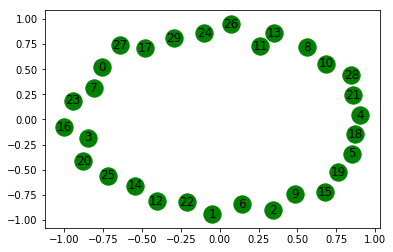

[22 13 20 ... 20 26 13]


/home/alberto/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


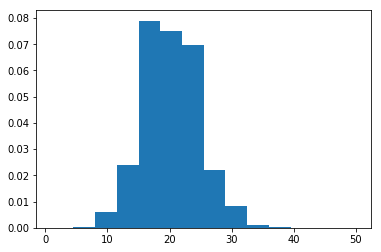

In [18]:
x = numpy.random.poisson(20, 20000000)
print(x)
count, bins, ignored = plt.hist(x, 14, normed=True)
plt.show()

[0.0709327  0.18518663 0.14354343 ... 0.0954438  0.05053816 0.03000834]


/home/alberto/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


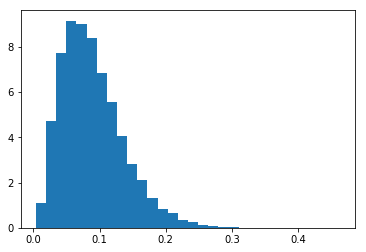

In [19]:
x = numpy.random.gamma(3.456,0.026,20000)
print(x)
count, bins, ignored = plt.hist(x, 30, normed=True)
plt.show()

[9.0, 7.0, 5.0, 6.0, 6.0, 5.0, 6.0, 4.0, 9.0, 8.0, 6.0, 6.0, 4.0, 6.0, 8.0, 8.0, 7.0, 7.0, 6.0, 7.0]


/home/alberto/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


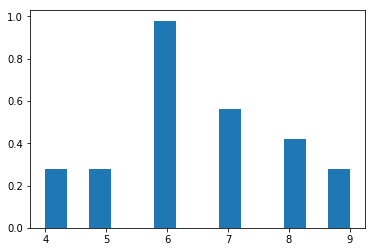